In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, transform, color
from skimage.feature import match_template

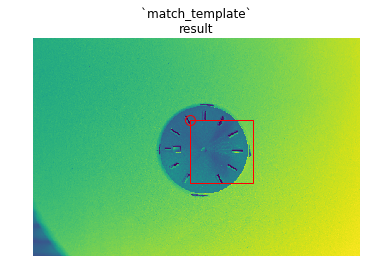

In [21]:
def resize_with_scaling(img, single_factor=0.5, r_shape=None):
    # resize (with scaling info to make thresholding easier afterwards)
    orig_x, orig_y = img.shape[:2]
    if r_shape is not None:
        new_x, new_y = r_shape
        x_sf = orig_x*1.0/new_x
        y_sf = orig_y*1.0/new_y
    else:
        new_x = int(orig_x * 1.0 *single_factor)
        new_y = int(orig_y * 1.0 * single_factor)
        x_sf, y_sf = (single_factor, single_factor)
    resized = transform.resize(img, (new_x, new_y))
    return resized, (x_sf, y_sf)

im = color.rgb2gray(io.imread("combined_test/bood.jpg"))
tem = color.rgb2gray(io.imread("combined_test/template.png"))
im_small, _ = resize_with_scaling(im, 0.1)
tem_small, _ = resize_with_scaling(tem, 0.1)
# plt.imshow(im_small)

fig,ax = plt.subplots()

result = match_template(im_small, tem_small)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
ax.imshow(im_small)
ax.set_axis_off()
ax.set_title('`match_template`\nresult')
# highlight matched region
ax.autoscale(False)
hcoin, wcoin = tem_small.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
ax.add_patch(rect)
plt.show()